# About the Dataset

Context - This is a subset of dataset of Book reviews from Amazon Kindle Store Categor.

Content 5-core dataset of product reviews from Amazon Kindle Store category from May 1996 - July 2014. Contains total of 982619 entries. Each reviewer has at least 5 reviews and each product has at least 5 reviews in this dataset. Columns



*   asin - ID of the Product, like B000FA64PK
*   helpful - helpfulness rating of the review - example: 2/3
*   overall - rating of the product
*   reviewText - text of the review (heading)
*   reviewTime - time of the review (raw)
*   reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
*   reviewrName - name of the reviewer
*   summary - summary of the review
*   unixReviewTime - unix timestamp




## Best Practices

1. Preprocessing and Cleaning
2. Train Test Split
3. BOW, TFIDF, Word2Vec
4. Train ML algorithms

In [64]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
# Load the dataset
import pandas as pd
data = pd.read_csv('all_kindle_review.csv')

In [66]:
data.head(5)

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [67]:
df = data[['reviewText', 'rating']]
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [68]:
df.shape

(12000, 2)

In [69]:
## Missing Values
df.isnull().sum()

,0
reviewText,0
rating,0


In [70]:
df['rating'].unique()

array([3, 5, 4, 2, 1])

In [71]:
df['rating'].value_counts() ## Not an imbalanced dataset

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


### Preprocessing and Cleaning


In [72]:
## positive review is 1 and negative review is 0 (we are only focusing on two types of review positive and negative)
## reviews having rating less than equal 3 is a negative and greater than 3 is a positive
df['rating'] = df['rating'].apply(lambda x: 0 if x < 3 else 1)

<ipython-input-72-be5207e129a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].apply(lambda x: 0 if x < 3 else 1)


In [73]:
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",1
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,1
3,Aggie is Angela Lansbury who carries pocketboo...,1
4,I did not expect this type of book to be in li...,1


In [74]:
df['rating'].value_counts()

,count
rating,
1,8000
0,4000


In [75]:
## Lower all the cases
df['reviewText'] = df['reviewText'].str.lower()

<ipython-input-75-275e501eebe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].str.lower()


In [76]:
df.head()

,reviewText,rating
0,"jace rankin may be short, but he's nothing to ...",1
1,great short read. i didn't want to put it dow...,1
2,i'll start by saying this is the first of four...,1
3,aggie is angela lansbury who carries pocketboo...,1
4,i did not expect this type of book to be in li...,1


In [77]:
## removing all the special characters
df['reviewText']= df['reviewText'].apply(lambda x: re.sub('[^a-z A-Z 0-9]+', '',x))

<ipython-input-77-6b4c0d5c05a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText']= df['reviewText'].apply(lambda x: re.sub('[^a-z A-Z 0-9]+', '',x))


In [78]:
## removing the stopwords

df['reviewText'] = df['reviewText'].apply(lambda x:" ".join([word for word in x.split() if word not in stopwords.words('english') ]))

<ipython-input-78-8b1b56243cf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].apply(lambda x:" ".join([word for word in x.split() if word not in stopwords.words('english') ]))


In [79]:
## removing the urls
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', str(x)))

<ipython-input-79-6bf0428e4cbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', str(x)))


In [80]:
## removing the html tags
df['reviewText'] = df['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

<ipython-input-80-1dc469eecb51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())


In [81]:
## removing additional spaces
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x.split()))

<ipython-input-81-a1a23025d212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x.split()))


In [82]:
df.head()

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1


In [83]:
## applying lemmatization

lemmatizer = WordNetLemmatizer()

In [84]:
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [85]:
df['reviewText'] = df['reviewText'].apply(lambda x: lemmatize_words(x))

<ipython-input-85-b1fd4ac61595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].apply(lambda x: lemmatize_words(x))


In [86]:
df.head()

,reviewText,rating
0,jace rankin may short he nothing mess man haul...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four book wasnt expecti...,1
3,aggie angela lansbury carry pocketbook instead...,1
4,expect type book library pleased find price right,1


### Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['rating'], test_size = 0.2)

### Words to Vectors (using avg word2vec)


In [88]:
!pip install gensim
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [89]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [110]:
X_train

,reviewText
2505,sure got hot sexy wet fireman incredibly lovea...
845,story unusual ended abruptly wasnt clear relat...
2245,thought sleepwalker last sandman well written ...
4318,first time read book scrayton bit thriller cha...
3587,im new series read first two book loved enough...
...,...
10789,liked ending book epilogue repeat lot matter m...
9099,first would like point lot thing love book alt...
2490,seemed bad term paper lot reference book also ...
676,say ea one imaginative author ever read think ...


In [111]:
X_test

,reviewText
6931,book hooked beginning character great sex hot ...
7842,thought would great book reading description a...
10159,love kallystens story one dissappoint everythi...
9304,seriously rate realize split 3but even really ...
10153,gave good try premise really good could make o...
...,...
11618,small easy carry charger car doesnt get way fu...
6094,enjoyed book liked character didnt figure kill...
9731,dark land virus killed possibility female offs...
9271,absolutely love book glad found wonder never h...


In [112]:
X_train_words = []
for sent in X_train:
  X_train_sent_token = sent_tokenize(sent)
  for sent in X_train_sent_token:
    X_train_words.append(simple_preprocess(sent))


In [97]:
X_test_words = []
for sent in X_test:
  X_test_sent_token = sent_tokenize(sent)
  for sent in X_test_sent_token:
    X_test_words.append(simple_preprocess(sent))

In [98]:
## train word2vec from scratch
#model = gensim.models.Word2Vec(X_train_words)

In [113]:
## vocab of the model
wv.index_to_key

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [114]:
!pip install tqdm
from tqdm import tqdm

In [115]:
## creating the avg w2v function

import numpy as np

def avg_word2vec(doc):
  # remove out of vocabulary words
  # sent = [word for word in doc if word in model.wv.index_to_key]
  # print(sent)

  return np.mean([wv[word] for word in doc if word in wv.index_to_key], axis=0)

In [116]:
X_train_new = []
for i in tqdm(range(len(X_train_words))):
  X_train_new.append(avg_word2vec(X_train_words[i]))

100%|██████████| 9600/9600 [33:58<00:00,  4.71it/s]


In [117]:
X_test_new = []
for i in tqdm(range(len(X_test_words))):
  X_test_new.append(avg_word2vec(X_test_words[i]))

100%|██████████| 2400/2400 [07:48<00:00,  5.12it/s]


In [105]:
len(X_train_new)

9600

In [118]:
len(X_test_new)

2400

In [121]:
X_train_new_arr = np.array(X_train_new)
X_train_new_arr.shape

(9600, 300)

In [123]:
X_test_new_arr = np.array(X_test_new)
X_test_new_arr.shape

(2400, 300)

### Model Training


In [136]:
## using Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB().fit(X_train_new_arr, y_train)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [129]:
y_pred = gnb_model.predict(X_test_new_arr)

In [130]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.74125


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.81      0.68       809
           1       0.88      0.71      0.78      1591

    accuracy                           0.74      2400
   macro avg       0.73      0.76      0.73      2400
weighted avg       0.78      0.74      0.75      2400



In [137]:
## using Logistic Regression
from sklearn.linear_model import LogisticRegression
lreg_model = LogisticRegression().fit(X_train_new_arr, y_train)

In [133]:
y_pred_lreg = lreg_model.predict(X_test_new_arr)

In [134]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_lreg))

Accuracy Score:  0.8158333333333333


In [135]:
print(classification_report(y_test, y_pred_lreg))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69       809
           1       0.83      0.91      0.87      1591

    accuracy                           0.82      2400
   macro avg       0.81      0.77      0.78      2400
weighted avg       0.81      0.82      0.81      2400



In [151]:
## using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=700, random_state=42).fit(X_train_new_arr, y_train)

In [152]:
y_pred_rf = rf_model.predict(X_test_new_arr)

In [153]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))

Accuracy Score:  0.7679166666666667


In [154]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.41      0.55       809
           1       0.76      0.95      0.84      1591

    accuracy                           0.77      2400
   macro avg       0.78      0.68      0.70      2400
weighted avg       0.77      0.77      0.74      2400



In [165]:
## using a Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = RandomForestClassifier(n_estimators=200)

voting_clf = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2), ('rf', clf3)], voting='soft')
voting_clf.fit(X_train_new_arr, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('gnb', GaussianNB()),
                             ('rf', RandomForestClassifier(n_estimators=200))],
                 voting='soft')

In [168]:
y_pred_vclf = voting_clf.predict(X_test_new_arr)

In [169]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_vclf))

Accuracy Score:  0.7704166666666666


### Visualisations


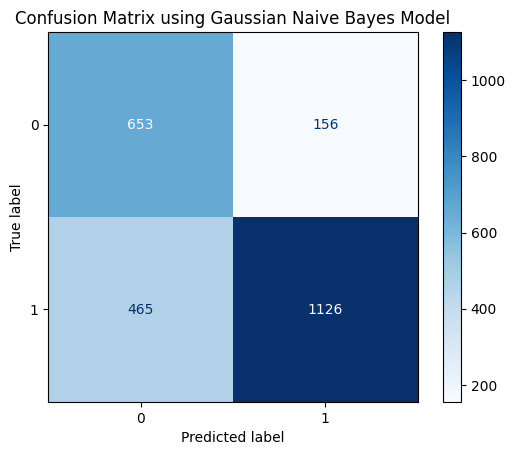

In [157]:
## Confusion matrix plot of GNB Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_gnb = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_gnb).plot(cmap='Blues')
plt.title("Confusion Matrix using Gaussian Naive Bayes Model")
plt.show()


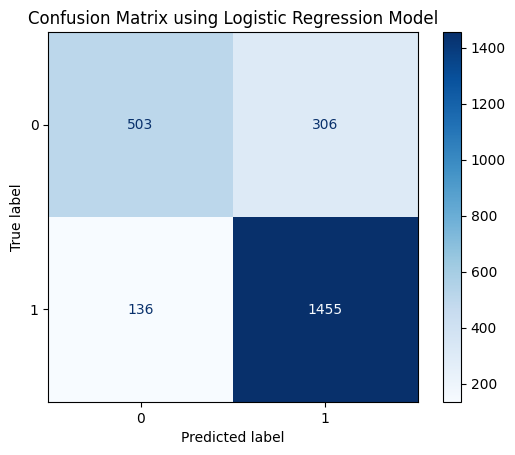

In [158]:
## Confusion matrix plot of LREG Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_lreg = confusion_matrix(y_test, y_pred_lreg)
ConfusionMatrixDisplay(cm_lreg).plot(cmap='Blues')
plt.title("Confusion Matrix using Logistic Regression Model")
plt.show()

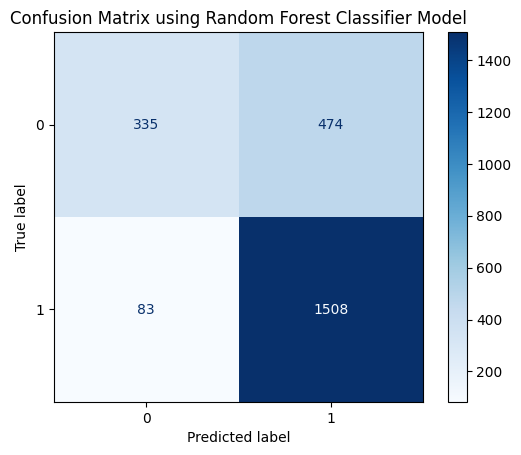

In [160]:
## Confusion matrix plot of RF Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap='Blues')
plt.title("Confusion Matrix using Random Forest Classifier Model")
plt.show()

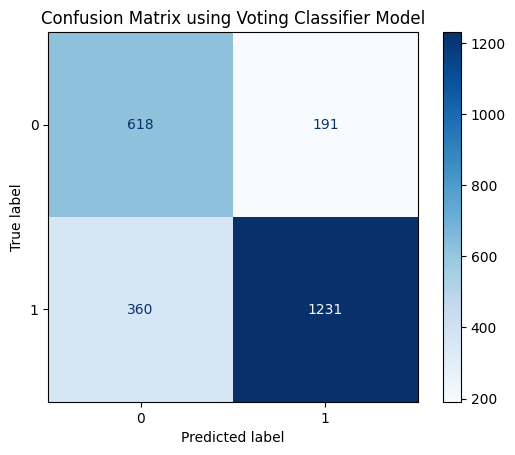

In [170]:
## Confusion matrix plot of VCLF Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_vclf = confusion_matrix(y_test, y_pred_vclf)
ConfusionMatrixDisplay(cm_vclf).plot(cmap='Blues')
plt.title("Confusion Matrix using Voting Classifier Model")
plt.show()